# 📊 Previsão de Séries Temporais com RNN (LSTM) - Ações da Apple

## 📌 Sobre o Projeto
Este projeto utiliza uma **Rede Neural Recorrente (RNN) com LSTMs** para prever **preços de ações** com base em dados históricos.

### **📌 O que o código faz?**
✅ **Baixa os dados históricos da Apple (AAPL) via Yahoo Finance**  
✅ **Normaliza os preços e cria sequências para treino**  
✅ **Treina um modelo RNN com LSTM para prever preços futuros**  
✅ **Avalia o erro da previsão (MAE - Mean Absolute Error)**  
✅ **Plota gráficos dos preços reais vs. previstos**  

---

## 📊 **Melhoria do Modelo**
✔ **Uso de LSTM** → Melhor aprendizado de padrões temporais  
✔ **Regularização com Dropout** → Reduz overfitting  
✔ **Otimização com Adam** → Acelera o aprendizado  
✔ **Treinamento com 50 épocas** → Melhor estabilidade  

---

## 🔧 **Requisitos**
Antes de rodar o código, instale as dependências necessárias:

```bash
pip install tensorflow numpy pandas matplotlib seaborn scikit-learn yfinance


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0270 - val_loss: 0.0049
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0011 - val_loss: 0.0059
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.6841e-04 - val_loss: 0.0012
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.8617e-04 - val_loss: 0.0016
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.7524e-04 - val_loss: 0.0019
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 8.8605e-04 - val_loss: 0.0026
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.7223e-04 - val_loss: 0.0025
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 8.2299e-04 - val_loss: 0.0033
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/ste

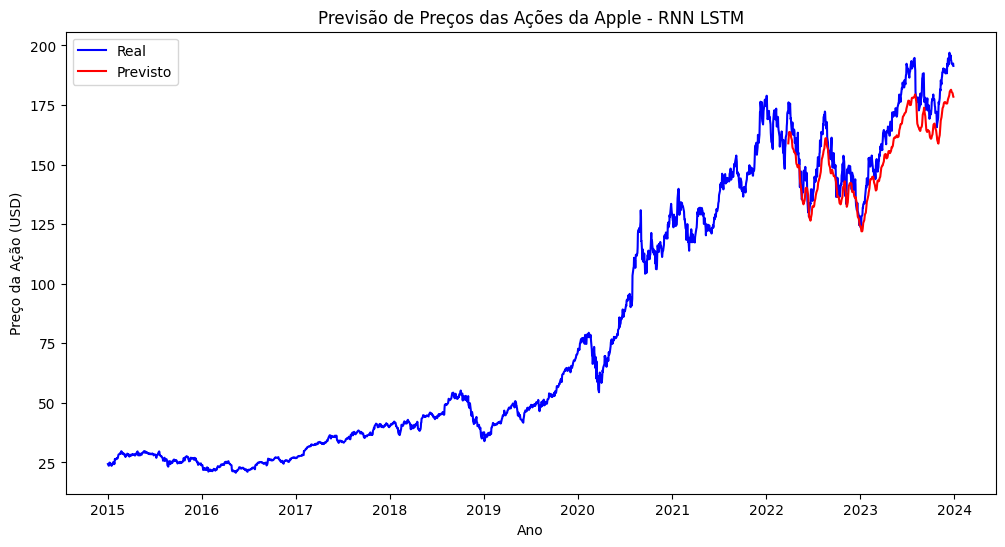

In [3]:
# 📌 Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import yfinance as yf

# 🔹 1. Baixar e carregar os dados históricos da Apple (AAPL)
def carregar_dados():
    df = yf.download("AAPL", start="2015-01-01", end="2024-01-01")
    df = df[['Close']]  # Pegamos apenas o preço de fechamento
    return df

# 🔹 2. Criar sequências para treinamento do modelo RNN
def criar_sequencias(dados, n_steps=50):
    X, y = [], []
    for i in range(len(dados) - n_steps):
        X.append(dados[i:i + n_steps])
        y.append(dados[i + n_steps])
    return np.array(X), np.array(y)

# 🔹 3. Construir o modelo RNN com LSTM
def criar_modelo(input_shape):
    modelo = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(64, return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)  # Previsão do preço futuro
    ])
    
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return modelo

# 🔹 4. Treinar o modelo RNN
def treinar_modelo(modelo, X_train, y_train, X_test, y_test):
    historico = modelo.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    return historico

# 🔹 5. Plotar os resultados reais vs. previstos
def plotar_resultados(df, previsoes, n_steps, split):
    plt.figure(figsize=(12, 6))

    # Plota os valores reais
    plt.plot(df.index, df['Close'], label="Real", color="blue")

    # Ajusta os índices para corresponder ao tamanho das previsões
    previsao_indices = df.index[split + n_steps:split + n_steps + len(previsoes)]
    
    # Plota os valores previstos
    plt.plot(previsao_indices, previsoes, label="Previsto", color="red")

    plt.xlabel("Ano")
    plt.ylabel("Preço da Ação (USD)")
    plt.title("Previsão de Preços das Ações da Apple - RNN LSTM")
    plt.legend()
    plt.show()

# 🚀 Executar fluxo principal
if __name__ == "__main__":
    # 1️⃣ Carregar os dados
    df = carregar_dados()

    # 2️⃣ Normalizar os dados
    scaler = MinMaxScaler(feature_range=(0, 1))
    dados_normalizados = scaler.fit_transform(df)

    # 3️⃣ Criar sequências para treinamento
    n_steps = 50  # Tamanho da janela de observação
    X, y = criar_sequencias(dados_normalizados, n_steps)

    # 4️⃣ Dividir os dados em treino e teste
    split = int(len(X) * 0.8)
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # 5️⃣ Criar e treinar o modelo
    modelo_rnn = criar_modelo((n_steps, 1))
    historico = treinar_modelo(modelo_rnn, X_train, y_train, X_test, y_test)

    # 6️⃣ Fazer previsões
    previsoes = modelo_rnn.predict(X_test)

    # 7️⃣ Reverter a normalização das previsões para a escala original
    previsoes = scaler.inverse_transform(previsoes.reshape(-1, 1))

    # 8️⃣ Avaliar o erro
    erro = mean_absolute_error(df['Close'].iloc[split + n_steps:split + n_steps + len(previsoes)], previsoes)
    print(f"📊 Erro Médio Absoluto (MAE): {erro:.2f} USD")

    # 9️⃣ Plotar os resultados
    plotar_resultados(df, previsoes, n_steps, split)
